# Finding the Census Tracts for Ontario, CA

In this notebook, I use mapping features to figure out what are the census tracts for Ontario, California. This is an essential step for our group project because we intend to do our analysis at the census tract level. 

Data Sources: [U.S. Census](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html), [California Department of Forestry and Fire Protection](https://data.cnra.ca.gov/dataset/city-boundaries)

by: alejandra rios

In [1]:
#importing the packages needed
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

## California City Boundaries

In [2]:
#input: loading the data with the city boundaries shapes
#outcome: a preview of the dataset as a table
cities =gpd.read_file('../Data/CityBoundaries')
cities

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


OBJECTID          COUNTY          CITY   Shape__Area  Shape__Length  \
0           1  San Bernardino      Adelanto  2.025272e+08  122818.299432   
1           2     Los Angeles  Agoura Hills  2.964318e+07   29626.940723   
2           3         Alameda       Alameda  4.358305e+07   52137.876912   
3           4         Alameda        Albany  7.558117e+06   16774.017561   
4           5     Los Angeles      Alhambra  2.888338e+07   25461.487633   
..        ...             ...           ...           ...            ...   
477       478            Napa    Yountville  6.139924e+06   18166.776479   
478       479        Siskiyou         Yreka  4.679887e+07   64683.190766   
479       480          Sutter     Yuba City  6.630216e+07   74665.952003   
480       481  San Bernardino       Yucaipa  1.068584e+08   66660.772363   
481       482  San Bernardino  Yucca Valley  1.509317e+08   63739.235174   

                                 GlobalID  \
0    a112aaa2-6c60-4c6f-83c5-5a03126064e8   
1    b9192abb-2d64-4f7b-b9dc-97b8a703521b   
2    b8a7f28a-a71e-4e96-bd7e-78cf84f27f7d   
3    f25071bd-a3d2-437a-bdf4-2d25a0aea1f4   
4    a74ff6de-81a9-4d98-b4dc-a1f9d9730f4b   
..                                    ...   
477  735a240a-584d-4627-8090-a2e92033d000   
478  a1a1efeb-3906-417a-812e-2184e2101bd5   
479  060e429b-d220-42b0-82c9-bb07aa3ceb8b   
480  048cc48d-99e6-4541-97c5-27b43a221a05   
481  680fbc80-bd8b-4699-8097-b49c2b3f207e   

                                              geometry  
0    MULTIPOLYGON (((-117.39176 34.62317, -117.3917...  
1    POLYGON ((-118.71981 34.13628, -118.71981 34.1...  
2    MULTIPOLYGON (((-122.33016 37.79712, -122.3293...  
3    POLYGON ((-122.28808 37.89800, -122.28769 37.8...  
4    POLYGON ((-118.12109 34.10537, -118.11693 34.1...  
..                                                 ...  
477  POLYGON ((-122.35656 38.40577, -122.35638 38.4...  
478  POLYGON ((-122.58754 41.76826, -122.58752 41.7...  
479  POLYGON ((-121.60540 39.14958, -121.60544 39.1...  
480  POLYGON ((-116.99603 34.00450, -116.99681 34.0...  
481  POLYGON ((-116.42249 34.17340, -116.42249 34.1...  

[482 rows x 7 columns]

In [3]:
#input: find projection information about the data
#output: the projection info for the data
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
#input:Setting WGS 84 (epsg:4326) as the geographic coordinate system
#output:observing the first 5 rows of the data
cities = cities.to_crs(epsg=4326)
print(cities.crs)
cities.head()

epsg:4326


OBJECTID          COUNTY          CITY   Shape__Area  Shape__Length  \
0         1  San Bernardino      Adelanto  2.025272e+08  122818.299432   
1         2     Los Angeles  Agoura Hills  2.964318e+07   29626.940723   
2         3         Alameda       Alameda  4.358305e+07   52137.876912   
3         4         Alameda        Albany  7.558117e+06   16774.017561   
4         5     Los Angeles      Alhambra  2.888338e+07   25461.487633   

                               GlobalID  \
0  a112aaa2-6c60-4c6f-83c5-5a03126064e8   
1  b9192abb-2d64-4f7b-b9dc-97b8a703521b   
2  b8a7f28a-a71e-4e96-bd7e-78cf84f27f7d   
3  f25071bd-a3d2-437a-bdf4-2d25a0aea1f4   
4  a74ff6de-81a9-4d98-b4dc-a1f9d9730f4b   

                                            geometry  
0  MULTIPOLYGON (((-117.39176 34.62317, -117.3917...  
1  POLYGON ((-118.71981 34.13628, -118.71981 34.1...  
2  MULTIPOLYGON (((-122.33016 37.79712, -122.3293...  
3  POLYGON ((-122.28808 37.89800, -122.28769 37.8...  
4  POLYGON ((-118.12109 34.10537, -118.11693 34.1...

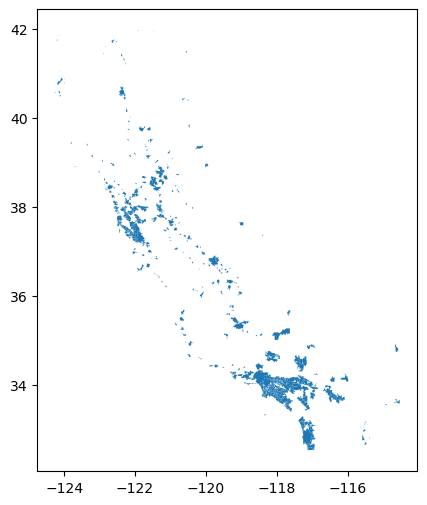

In [5]:
#input: use of plotly to visualize the data
#output: simple plot of the data
cities.plot(figsize=(6, 6))
plt.show()

In [6]:
# input: create a basemap zoomed into Ontario
# output: basemap 
m = folium.Map(location=[34.0633, -117.6509], zoom_start=12, tiles='CartoDB positron')
m

In [7]:
#input: for loop to add the polygons to the map
#output: a map showing the boundaries of cities in california

for _, r in cities.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    #adding name of the city as a popup
    folium.Popup(r['CITY']).add_to(geo_j)
    geo_j.add_to(m)
m

In [8]:
#input: use .centroid to get the centroids
#output: get centroid for each city 

# Project to NAD83 projected crs
cities = cities.to_crs(epsg=2263)
# find the centroid (midpoint) of each polygon/city
cities['centroid'] = cities.centroid

In [9]:
# Project to WGS84 geographic crs
# geometry (active) column
cities = cities.to_crs(epsg=4326)

# Create a centroid column
cities['centroid'] = cities['centroid'].to_crs(epsg=4326)

#show the first 5 rows
cities.head()

OBJECTID          COUNTY          CITY   Shape__Area  Shape__Length  \
0         1  San Bernardino      Adelanto  2.025272e+08  122818.299432   
1         2     Los Angeles  Agoura Hills  2.964318e+07   29626.940723   
2         3         Alameda       Alameda  4.358305e+07   52137.876912   
3         4         Alameda        Albany  7.558117e+06   16774.017561   
4         5     Los Angeles      Alhambra  2.888338e+07   25461.487633   

                               GlobalID  \
0  a112aaa2-6c60-4c6f-83c5-5a03126064e8   
1  b9192abb-2d64-4f7b-b9dc-97b8a703521b   
2  b8a7f28a-a71e-4e96-bd7e-78cf84f27f7d   
3  f25071bd-a3d2-437a-bdf4-2d25a0aea1f4   
4  a74ff6de-81a9-4d98-b4dc-a1f9d9730f4b   

                                            geometry  \
0  MULTIPOLYGON (((-117.39176 34.62317, -117.3917...   
1  POLYGON ((-118.71981 34.13628, -118.71981 34.1...   
2  MULTIPOLYGON (((-122.33016 37.79712, -122.3293...   
3  POLYGON ((-122.28808 37.89800, -122.28769 37.8...   
4  POLYGON ((-118.12109 34.10537, -118.11693 34.1...   

                      centroid  
0  POINT (-117.43973 34.58138)  
1  POINT (-118.76087 34.15100)  
2  POINT (-122.26637 37.76539)  
3  POINT (-122.30023 37.88983)  
4  POINT (-118.13550 34.08395)

In [10]:
#input: add the centroid data to the map
#output: showing the centroids as popups to the map
for _, r in cities.iterrows():
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker(location=[lat, lon],
                  popup='length: {} <br> area: {}'.format(r['Shape__Length'], r['Shape__Area'])).add_to(m)

m

## Ontario city boundary

#### *Using filtering to show only Ontario on the map*

In [11]:
#input: add a filter to the CITY column for Ontario
#output: show only the data for the Ontario row
ontario = cities[cities["CITY"] == 'Ontario']
ontario

OBJECTID          COUNTY     CITY   Shape__Area  Shape__Length  \
294       295  San Bernardino  Ontario  1.887828e+08   65548.480112   

                                 GlobalID  \
294  3c71896c-447f-4065-80b5-899d61ad858f   

                                              geometry  \
294  POLYGON ((-117.62871 34.09268, -117.62867 34.0...   

                        centroid  
294  POINT (-117.60634 34.03917)

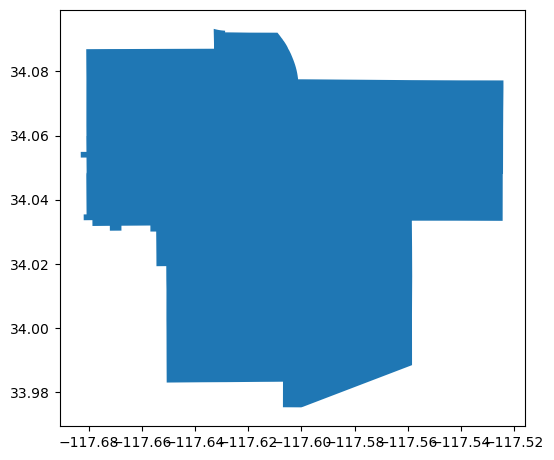

In [12]:
#input: use plotly to visualize the polygon shape for ontario
#output: viazualization of ontario's boundary 
ontario.plot(figsize=(6, 6))
plt.show()

In [13]:
# Using WGS 84 (epsg:4326) as the geographic coordinate system
#output:observing ontario data and geo coordinate system

ontario = ontario.to_crs(epsg=4326)
print(ontario.crs)
ontario.head()

EPSG:4326


OBJECTID          COUNTY     CITY   Shape__Area  Shape__Length  \
294       295  San Bernardino  Ontario  1.887828e+08   65548.480112   

                                 GlobalID  \
294  3c71896c-447f-4065-80b5-899d61ad858f   

                                              geometry  \
294  POLYGON ((-117.62871 34.09268, -117.62867 34.0...   

                        centroid  
294  POINT (-117.60634 34.03917)

In [14]:
#input: create new basemap for mapping ontario
#output: basemap

om = folium.Map(location=[34.0633, -117.6509], zoom_start=12, tiles='CartoDB positron')
om

In [15]:
#input: for loop for adding the polygon data for ontario to the basemap
#output: map vizualization of ontario 

for _, r in ontario.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'blue'})
    folium.Popup(r['CITY']).add_to(geo_j)
    geo_j.add_to(om)
om

## Mapping Ontario census tracts

In [16]:
#input: reading the data file containing all the census tracts 
#output: show table with the census tract data

tracts = gpd.read_file('../Data/censustracts')
tracts

STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID     NAME  \
0         06      009  000300  1400000US06009000300  06009000300        3   
1         06      011  000300  1400000US06011000300  06011000300        3   
2         06      013  303102  1400000US06013303102  06013303102  3031.02   
3         06      013  303202  1400000US06013303202  06013303202  3032.02   
4         06      013  303203  1400000US06013303203  06013303203  3032.03   
...      ...      ...     ...                   ...          ...      ...   
8036      06      075  022902  1400000US06075022902  06075022902   229.02   
8037      06      065  044804  1400000US06065044804  06065044804   448.04   
8038      06      099  003300  1400000US06099003300  06099003300       33   
8039      06      037  124400  1400000US06037124400  06037124400     1244   
8040      06      107  003901  1400000US06107003901  06107003901    39.01   

     LSAD      ALAND   AWATER  \
0      CT  457009794   394122   
1      CT  952744514   195376   
2      CT    6507019        0   
3      CT    3725528        0   
4      CT    6354210        0   
...   ...        ...      ...   
8036   CT     161833        0   
8037   CT    2374766   248057   
8038   CT  640784444  2596432   
8039   CT     961439    14163   
8040   CT    4993183    25643   

                                               geometry  
0     POLYGON ((-120.75008 38.29765, -120.75042 38.2...  
1     POLYGON ((-122.47953 39.15804, -122.47824 39.1...  
2     POLYGON ((-121.71412 37.97147, -121.71409 37.9...  
3     POLYGON ((-121.72346 37.96161, -121.72534 37.9...  
4     POLYGON ((-121.74335 37.96151, -121.74425 37.9...  
...                                                 ...  
8036  POLYGON ((-122.41205 37.75423, -122.41190 37.7...  
8037  POLYGON ((-116.51069 33.81593, -116.51068 33.8...  
8038  POLYGON ((-121.47265 37.48217, -121.47297 37.4...  
8039  POLYGON ((-118.41379 34.17940, -118.41417 34.1...  
8040  POLYGON ((-119.00850 36.07658, -119.00830 36.0...  

[8041 rows x 10 columns]

In [17]:
#input: add a filter to keep only the census tract data for San Bernadino (the county where Ontario is in)
#output: show the filter data as a table

ontariotracts = tracts[tracts["COUNTYFP"] == '071']
ontariotracts

STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID    NAME LSAD  \
268       06      071  009112  1400000US06071009112  06071009112   91.12   CT   
270       06      071  009713  1400000US06071009713  06071009713   97.13   CT   
271       06      071  009800  1400000US06071009800  06071009800      98   CT   
272       06      071  009912  1400000US06071009912  06071009912   99.12   CT   
273       06      071  010016  1400000US06071010016  06071010016  100.16   CT   
...      ...      ...     ...                   ...          ...     ...  ...   
7905      06      071  007306  1400000US06071007306  06071007306   73.06   CT   
7928      06      071  008001  1400000US06071008001  06071008001   80.01   CT   
7975      06      071  002018  1400000US06071002018  06071002018   20.18   CT   
8028      06      071  006700  1400000US06071006700  06071006700      67   CT   
8029      06      071  008500  1400000US06071008500  06071008500      85   CT   

         ALAND  AWATER                                           geometry  
268    4892473       0  POLYGON ((-117.43466 34.51755, -117.43473 34.5...  
270   20049137       0  POLYGON ((-117.19068 34.55689, -117.19046 34.5...  
271    3351493       0  POLYGON ((-117.29516 34.54869, -117.30068 34.5...  
272    2821704       0  POLYGON ((-117.32126 34.51319, -117.32275 34.5...  
273    5954851       0  POLYGON ((-117.36884 34.44130, -117.37175 34.4...  
...        ...     ...                                                ...  
7905   3321196       0  POLYGON ((-117.25417 34.05027, -117.25419 34.0...  
7928   4890513       0  POLYGON ((-117.20029 34.09482, -117.20045 34.0...  
7975   2603039       0  POLYGON ((-117.57574 34.15059, -117.59329 34.1...  
8028   1902343       0  POLYGON ((-117.32711 34.07762, -117.32714 34.0...  
8029  26818354       0  POLYGON ((-117.17891 34.03736, -117.17732 34.0...  

[369 rows x 10 columns]

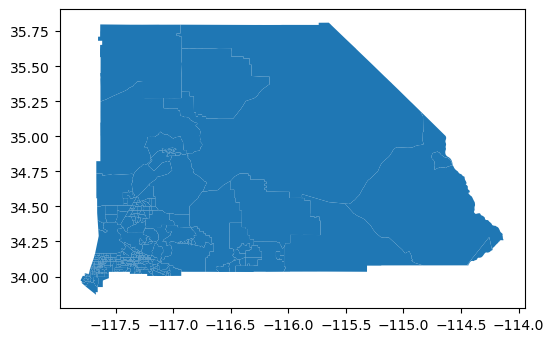

In [18]:
#input: use plotly to vizualize the filtered data
#output: a visual of the filtered census tracts

ontariotracts.plot(figsize=(6, 6))
plt.show()

## Overlaying census tract data to the Ontario boundary data

In [19]:
#input:Setting WGS 84 (epsg:4326) as the geographic coordinate system
#output:observing the first 5 rows of the data

ontariotracts = ontariotracts.to_crs(epsg=4326)
print(ontariotracts.crs)
ontariotracts.head()

epsg:4326


STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID    NAME LSAD  \
268      06      071  009112  1400000US06071009112  06071009112   91.12   CT   
270      06      071  009713  1400000US06071009713  06071009713   97.13   CT   
271      06      071  009800  1400000US06071009800  06071009800      98   CT   
272      06      071  009912  1400000US06071009912  06071009912   99.12   CT   
273      06      071  010016  1400000US06071010016  06071010016  100.16   CT   

        ALAND  AWATER                                           geometry  
268   4892473       0  POLYGON ((-117.43466 34.51755, -117.43473 34.5...  
270  20049137       0  POLYGON ((-117.19068 34.55689, -117.19046 34.5...  
271   3351493       0  POLYGON ((-117.29516 34.54869, -117.30068 34.5...  
272   2821704       0  POLYGON ((-117.32126 34.51319, -117.32275 34.5...  
273   5954851       0  POLYGON ((-117.36884 34.44130, -117.37175 34.4...

In [20]:
#input: for loop to add the census tracts data to the om map 
#output: map showing the census tracts over the ontario city boundary

for _, r in ontariotracts.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'red'})
    folium.Popup(r['GEOID']).add_to(geo_j)
    geo_j.add_to(om)
om

In [21]:
#input: create a filter so that only the census tracts that include parts of ontario are included in a new list
#output: a table with the census tracts in ontario

options = ['06071001903', '06071001906', '06071001905', '06071001703', '06071001804','06071001806','06071001808',
           '06071001809','06071002206','06071012700','06071001803','06071001810','06071001704','06071001702','06071001707',
           '06071001812','06071001813','06071001600','06071001001','06071001002','06071001101','06071001400','06071001501',
           '06071001503','06071001104','06071001706','06071000603','06071000304','06071001103','06071001200','06071001310',
           '06071001309','06071001305','06071001308','06071001312','06071002109','06071001504','06071001307'] 
ontariotractsfiltered = ontariotracts[ontariotracts['GEOID'].isin(options)] 

ontariotractsfiltered

STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID   NAME LSAD  \
435       06      071  001307  1400000US06071001307  06071001307  13.07   CT   
436       06      071  001703  1400000US06071001703  06071001703  17.03   CT   
437       06      071  001812  1400000US06071001812  06071001812  18.12   CT   
717       06      071  001002  1400000US06071001002  06071001002  10.02   CT   
718       06      071  001310  1400000US06071001310  06071001310  13.10   CT   
719       06      071  001503  1400000US06071001503  06071001503  15.03   CT   
720       06      071  001707  1400000US06071001707  06071001707  17.07   CT   
721       06      071  001810  1400000US06071001810  06071001810  18.10   CT   
1627      06      071  001101  1400000US06071001101  06071001101  11.01   CT   
2637      06      071  001308  1400000US06071001308  06071001308  13.08   CT   
3262      06      071  001808  1400000US06071001808  06071001808  18.08   CT   
3503      06      071  000304  1400000US06071000304  06071000304   3.04   CT   
3509      06      071  001104  1400000US06071001104  06071001104  11.04   CT   
3510      06      071  001309  1400000US06071001309  06071001309  13.09   CT   
3511      06      071  001501  1400000US06071001501  06071001501  15.01   CT   
3512      06      071  001706  1400000US06071001706  06071001706  17.06   CT   
4715      06      071  001903  1400000US06071001903  06071001903  19.03   CT   
4716      06      071  001905  1400000US06071001905  06071001905  19.05   CT   
4862      06      071  001809  1400000US06071001809  06071001809  18.09   CT   
4898      06      071  012700  1400000US06071012700  06071012700    127   CT   
5064      06      071  001103  1400000US06071001103  06071001103  11.03   CT   
5065      06      071  001200  1400000US06071001200  06071001200     12   CT   
5066      06      071  001305  1400000US06071001305  06071001305  13.05   CT   
5068      06      071  001400  1400000US06071001400  06071001400     14   CT   
5070      06      071  001504  1400000US06071001504  06071001504  15.04   CT   
5071      06      071  001704  1400000US06071001704  06071001704  17.04   CT   
5072      06      071  001806  1400000US06071001806  06071001806  18.06   CT   
6539      06      071  001312  1400000US06071001312  06071001312  13.12   CT   
6540      06      071  001804  1400000US06071001804  06071001804  18.04   CT   
6544      06      071  002206  1400000US06071002206  06071002206  22.06   CT   
7177      06      071  001803  1400000US06071001803  06071001803  18.03   CT   
7388      06      071  000603  1400000US06071000603  06071000603   6.03   CT   
7390      06      071  001702  1400000US06071001702  06071001702  17.02   CT   
7391      06      071  001813  1400000US06071001813  06071001813  18.13   CT   
7617      06      071  001001  1400000US06071001001  06071001001  10.01   CT   
7698      06      071  001600  1400000US06071001600  06071001600     16   CT   
7699      06      071  001906  1400000US06071001906  06071001906  19.06   CT   
7701      06      071  002109  1400000US06071002109  06071002109  21.09   CT   

         ALAND  AWATER                                           geometry  
435    1281879       0  POLYGON ((-117.62857 34.09215, -117.62856 34.0...  
436    1909759       0  POLYGON ((-117.66764 34.03029, -117.66760 34.0...  
437     888388       0  POLYGON ((-117.65077 34.04925, -117.65074 34.0...  
717    1203162       0  POLYGON ((-117.68082 34.07406, -117.68082 34.0...  
718    1417244       0  POLYGON ((-117.64146 34.08708, -117.64144 34.0...  
719     553555       0  POLYGON ((-117.63481 34.07071, -117.63481 34.0...  
720    1709523       0  POLYGON ((-117.66979 34.04916, -117.66992 34.0...  
721     988342       0  POLYGON ((-117.65071 34.03745, -117.65069 34.0...  
1627    791646       0  POLYGON ((-117.67006 34.06878, -117.67006 34.0...  
2637   1077531       0  POLYGON ((-117.61986 34.08490, -117.61980 34.0...  
3262   1130298       0  POLYGON ((-117.62338 34.

## Converting DataFrame to CSV
csv to be merged to other data as we move forward with our project

In [22]:
#input: using pandas to covert the ontariotractsfiltered dataframe to a csv
#output: csv created but still needs to be saved
convertcsv= pd.DataFrame(ontariotractsfiltered)
csv_data = convertcsv.to_csv(index=False)

In [24]:
#input: saving the data from the data frame into a the csv file created 
#output: file should appear on the folder
with open('ontario.csv', 'w') as csv_file:
    convertcsv.to_csv(path_or_buf=csv_file)

This is the end of the purpose of this notebook. The following can be used in the future if needed. 

## Creating a map with the final data for a visual

In [25]:
#input: create a new map (final map)
#output: basemap for new map

ontariomap = folium.Map(location=[34.0633, -117.6509], zoom_start=12, tiles='CartoDB positron')
ontariomap

In [26]:
#input: for loop to add the outline data to the basemap
#output: ontario with a clear fill color

style = {'fillColor': '#00000000', 'color': '#00000000'}

for _, r in ontario.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': style})
    folium.Popup(r['CITY']).add_to(geo_j)
    geo_j.add_to(ontariomap)
ontariomap

In [27]:
#input: for loop to add the filtered census tract data to the basemap
#output: map with ontario boundary and the census tracts

for _, r in ontariotractsfiltered.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'green'})
    folium.Popup(r['GEOID']).add_to(geo_j)
    geo_j.add_to(ontariomap)
ontariomap

[nbviewer link](https://nbviewer.org/github/rg-al/UP221-cargo/blob/main/censustractsontario.ipynb)